# Export and import from Foliage

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import seaborn as sns

Create the function to transform the code that generate less than 1% of total dollars in "Othe Flower bulbs" and one class to associate codes with colors

In [2]:
def define_code(row, total):
    if row[1] > 0.01*total:
        return row[0]
    return "Other Foliage"

class ColorGenerator:
    def __init__(self):
        self.colors = ['#edd09e', '#1de286', '#5d680a', '#296d0a', '#02ede0', '#ad81d1', '#86afe8',
                       '#69e234', '#cae01d', '#e894e3', '#0c633b', '#d6e088', '#e52bda', '#e01a8d',
                       '#d18e91', '#63440d', '#560909', '#db8ab9', '#8b8c7e', '#86ceca', '#f2aa2e',
                       '#f21515', '#f9acac', '#081156', '#700e12', '#ef1019', '#2075ea', '#390f5b',
                       '#8de0b9', '#8823db', '#afe896', '#ba96ab', '#8e0286', '#8e0153']
        self.colors = ['yellow', 'blue', 'green', 'purple','red', 'orange', 'black', "brown"]
        self.index_color = 0
        self.dict_color = {}
        
    def color(self, code):
        if code in self.dict_color:
            return self.dict_color[code]
        self.dict_color[code] = self.colors[self.index_color]
        self.index_color += 1
        return self.dict_color[code]
    
    def reset(self):
        self.index_color = 0
        self.dict_color = {}
        
generator = ColorGenerator()


Define path of file and columns that we need to analize

In [3]:
filename_export = "data" + os.sep + "export" + os.sep + "all_export_with_group_and_label.txt"
filename_import = "data" + os.sep + "import" + os.sep + "all_import_with_group_and_label.txt"

usecols_export =  ["YEAR","TOTALVALORFOB", "CODIGOARANCEL", "GROUP"]
usecols_import =  ["YEAR", "CIF", "ARANC_NAC", "GROUP"]

Read data, filter that to only have the Flower bulbs group, change the columns name and concatenate the files in one big file.

In [4]:
data_import = pd.read_csv(filename_import, decimal=',',
                   sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                   usecols = usecols_import)

data_export = pd.read_csv(filename_export, decimal=',',
                          sep=";", encoding="latin1", quoting=csv.QUOTE_NONE,
                          usecols = usecols_export)
# concatenate data
data_export["TYPE"] = "Export"
data_import["TYPE"] = "Import"

data_export = data_export[data_export["GROUP"] == "Foliage"]
data_import = data_import[data_import["GROUP"] == "Foliage"]

data_export.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]
data_import.columns = ['USD', "CODIGO", 'YEAR', "GROUP", "TYPE"]

final_data = pd.concat([data_import, data_export])


Print the table

In [5]:
final_data[["USD", 'CODIGO', "TYPE", "YEAR"]].groupby(['CODIGO', "TYPE", "YEAR"]).sum().unstack().replace(np.nan, 0)

USD                                      \
YEAR                       2012        2013        2014        2015   
CODIGO       TYPE                                                     
Dracaena sp. Import   251677.79   309735.20        0.00        0.00   
Others       Export  3399429.07  3807867.59  3600677.77  2805065.21   
             Import  3136457.73  2466835.97   730921.96  1071503.15   

                                             
YEAR                       2016        2017  
CODIGO       TYPE                            
Dracaena sp. Import        0.00        0.00  
Others       Export  2338840.45  1080626.52  
             Import  1585320.06   366394.87

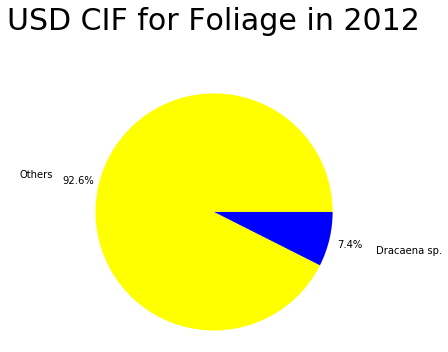

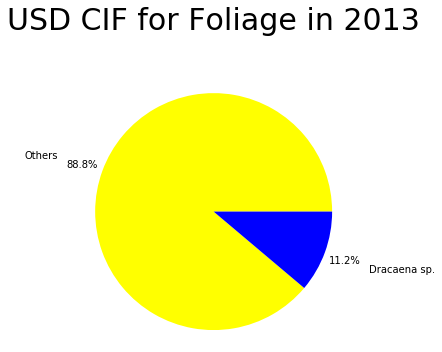

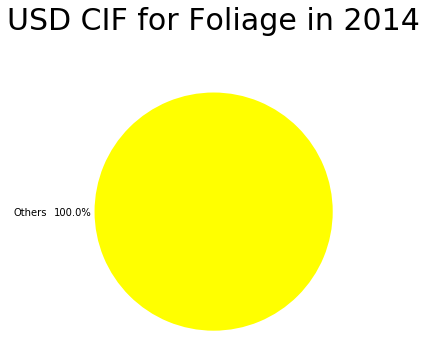

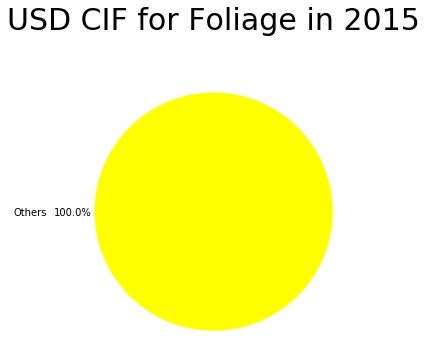

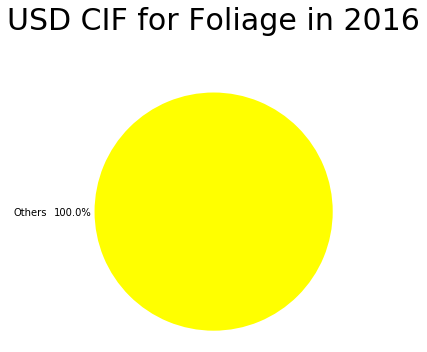

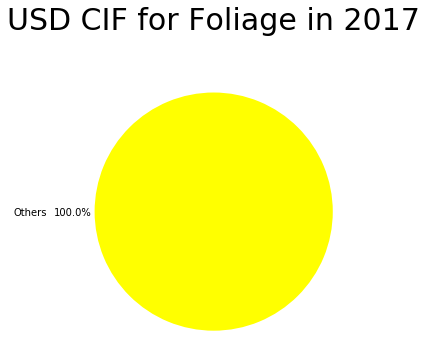

In [6]:
for year in range(2011, 2018):
    temporal_data = data_import[data_import["YEAR"] == year]

    if not temporal_data.empty:
        sums = temporal_data.groupby(['CODIGO']).sum().reset_index()
        total = sums["USD"].sum()

        sums['NAME_CODE'] = sums.apply(lambda x: define_code(x, total), axis=1)

        aux = sums[["NAME_CODE", "USD"]].groupby("NAME_CODE").sum()
        aux = aux.sort_values("USD", ascending=False)


        plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                labeldistance=1.4)


        plt.axis('equal')
        plt.tight_layout()

        plt.title("USD CIF for Foliage in {}".format(year), fontdict ={'fontsize': 30}, y=1.18)

        plt.savefig("USD CIF for Foliage in {}".format(year), bbox_inches='tight')
        plt.show()
generator.reset()

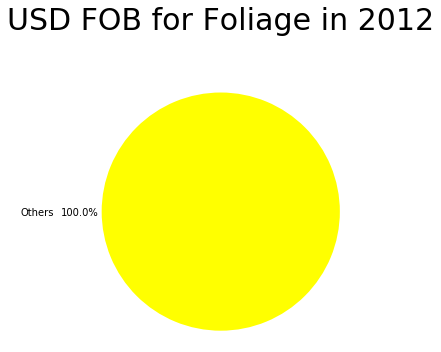

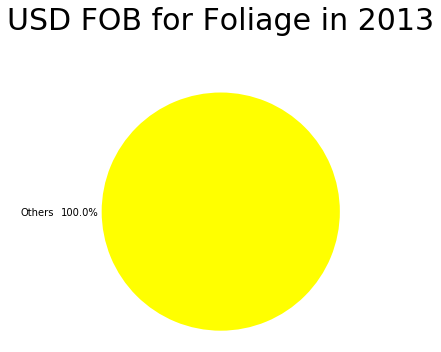

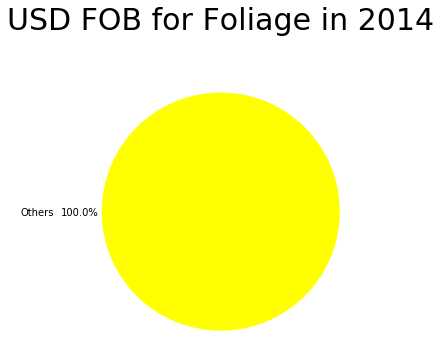

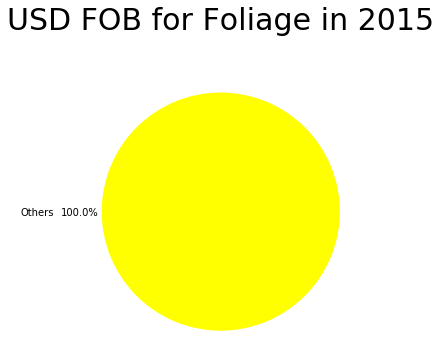

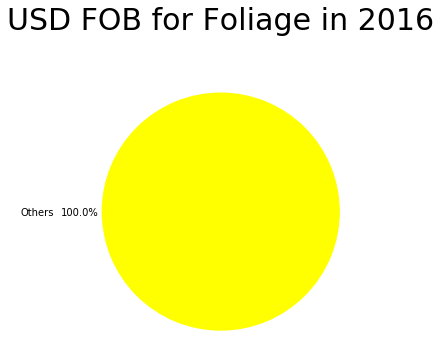

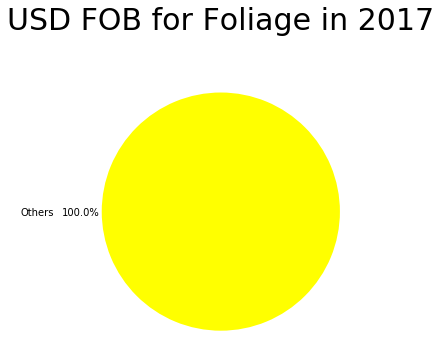

In [7]:
for year in range(2011, 2018):
    temporal_data = data_export[data_export["YEAR"] == year]

    if not temporal_data.empty:
        sums = temporal_data.groupby(['CODIGO']).sum().reset_index()
        total = sums["USD"].sum()

        sums['NAME_CODE'] = sums.apply(lambda x: define_code(x, total), axis=1)

        aux = sums[["NAME_CODE", "USD"]].groupby("NAME_CODE").sum()
        aux = aux.sort_values("USD", ascending=False)


        plt.pie(aux,colors= [generator.color(x) for x in aux.index],
                autopct='%1.1f%%', pctdistance=1.18, labels = aux.index, 
                labeldistance=1.4)


        plt.axis('equal')
        plt.tight_layout()

        plt.title("USD FOB for Foliage in {}".format(year), fontdict ={'fontsize': 30}, y=1.18)

        plt.savefig("USD FOB for Foliage in {}".format(year), bbox_inches='tight')
        plt.show()